# 2- EDA for movie box-office capstone project #
#### Amin Khoeini

***

__Goal of this project :__

To create a recomndation engine based on the review that the user provide about the movie.

1- In first step, the sentiment of the review needs to predict using the NLP to predict if the user love the movie
or not. For that purpose there is a column in the dataset called lable showing if the user "LOVE IT" or "NOT LOVE IT".Based on this lable the nlp model will predict the sentiment of the review for the next step.

2- If the user love the movie, the recomnadation engine using the hybrid model (content-base and user-user Data) will create a list of the movie that the user probably love to watch too.


### 1: General Information about dataset: 

__Loading the data and import packages__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
review_db = pd.read_csv('/Users/Amin/Documents/GitHub/Review-Sentiment-Analysis-with-Recommendation-System/data/clean_db.csv').reset_index()

In [3]:
review_db.head()

,index,reviewer,movie,review_summary,review_date,review_detail,lable,director,genre_1,genre_2,genre_3
0,0,OriginalMovieBuff21,Kill Bill: Vol. 2,good follow up that answers all the questions,2005-07-24,after seeing tarantino's kill bill vol: 1 i go...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
1,1,Bogmeister,Kill Bill: Vol. 2,the bride ends her rampage; we applaud,2005-08-15,the 2nd half of tarantino's tale of bloody rev...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
2,2,departed07,Kill Bill: Vol. 2,quentin tarantino's best since pulp fiction,2005-08-26,the bride is back and ready to kick ass in thi...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
3,3,Angeneer,Kill Bill: Vol. 2,quentin made me eat my hat,2005-09-08,i'm very happy to admit that tarantino proved ...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
4,4,LoneWolfAndCub,Kill Bill: Vol. 2,great ending to qt's tale of revenge,2005-09-07,kill bill volume 2 (directed by quentin tarant...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller


In [4]:
review_db.dtypes

index              int64
reviewer          object
movie             object
review_summary    object
review_date       object
review_detail     object
lable             object
director          object
genre_1           object
genre_2           object
genre_3           object
dtype: object

In [5]:
review_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475111 entries, 0 to 475110
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   index           475111 non-null  int64 
 1   reviewer        475111 non-null  object
 2   movie           475111 non-null  object
 3   review_summary  475110 non-null  object
 4   review_date     475111 non-null  object
 5   review_detail   475111 non-null  object
 6   lable           475111 non-null  object
 7   director        475111 non-null  object
 8   genre_1         475111 non-null  object
 9   genre_2         475111 non-null  object
 10  genre_3         475111 non-null  object
dtypes: int64(1), object(10)
memory usage: 39.9+ MB


#### Droping the NaN value from the dataset. ####

In [6]:
review_db.dropna(inplace=False)

,index,reviewer,movie,review_summary,review_date,review_detail,lable,director,genre_1,genre_2,genre_3
0,0,OriginalMovieBuff21,Kill Bill: Vol. 2,good follow up that answers all the questions,2005-07-24,after seeing tarantino's kill bill vol: 1 i go...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
1,1,Bogmeister,Kill Bill: Vol. 2,the bride ends her rampage; we applaud,2005-08-15,the 2nd half of tarantino's tale of bloody rev...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
2,2,departed07,Kill Bill: Vol. 2,quentin tarantino's best since pulp fiction,2005-08-26,the bride is back and ready to kick ass in thi...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
3,3,Angeneer,Kill Bill: Vol. 2,quentin made me eat my hat,2005-09-08,i'm very happy to admit that tarantino proved ...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
4,4,LoneWolfAndCub,Kill Bill: Vol. 2,great ending to qt's tale of revenge,2005-09-07,kill bill volume 2 (directed by quentin tarant...,LOVE IT,Quentin Tarantino,Action,Crime,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
475106,475106,leplatypus,Ghostbusters,so i saw the same movie 3 times (screen),2016-08-30,as gb2 was too much similar with gb1 and as th...,NOT LOVE IT,Paul Feig,Action,Comedy,Fantasy
475107,475107,scottshak_111,Ghostbusters,funny at times but falls flat big time.,2016-08-31,a tribute to the original. anything about ghos...,NOT LOVE IT,Paul Feig,Action,Comedy,Fantasy
475108,475108,Hollywood_Yoda,Ghostbusters,save your money,2016-09-01,first of all if the cast from the original gho...,NOT LOVE IT,Paul Feig,Action,Comedy,Fantasy
475109,475109,SteveStockholm,Ghostbusters,forget about the politics: this is a bad movie,2016-09-02,straight to the point. this movie is bad it fa...,NOT LOVE IT,Paul Feig,Action,Comedy,Fantasy


### 2. Unique Values

We can see there are almost half a million of review in the dataset. But how about the reviewer? When we creating the user-user based recomandation system it is important that we have enough data for that purpose.

In [7]:
review_db.reviewer.nunique()

11251

There are __11,250 unique reviewer__ data, it is a decent number for creating a recomandation system.

How about the movies?

In [8]:
review_db.movie.nunique()

3925

In [9]:
review_db.director.nunique()

1758

In [10]:
review_db.genre_1.nunique()

17

The reviews in the dataset are about __4000 unique movie title, 1750 unique director and 17 genre__ of the movie.

### 3. Review Lables Distribution:

Let's take a look at the distribution of the lable in the dataset and how reviewer labled the movies.

In [11]:
new_df = review_db.groupby('lable')['index'].count()
love_per = round(new_df.iloc[0]/(new_df.iloc[0]+new_df.iloc[1]) * 100,2)
no_love_per = round(new_df.iloc[1]/(new_df.iloc[0]+new_df.iloc[1]) * 100,2)
per = (love_per,no_love_per)

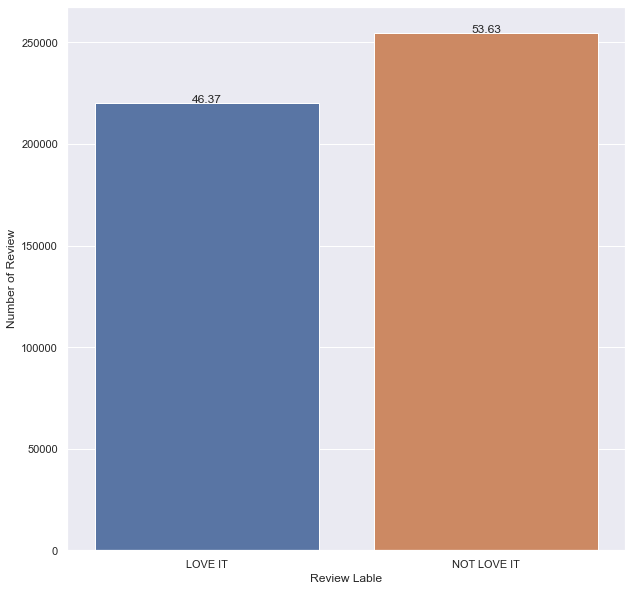

In [12]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot(x='lable',data=review_db)
plt.xlabel("Review Lable")
plt.ylabel("Number of Review")
for p,t in zip (ax.patches,per):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
        t,ha="center")

__46%__ of the review labled __Love IT__, means reviewer gave 7 or about score for the 46 percent of the movie they watched and wrote a review about it.

This is a very good distribution to create a NLP prediction model.

Let's see how many review each unique reviewer has in the dataset and the distribution of that number.

In [13]:
reviewer = review_db.groupby('reviewer').agg('count')
reviewer = reviewer.sort_values(by='review_detail',ascending=False)
reviewer.review_summary.value_counts().head(30)

9     715
10    685
8     635
11    557
7     541
6     425
12    409
13    408
5     354
14    340
4     282
1     275
3     261
15    251
2     237
16    235
17    210
19    187
18    164
21    157
20    143
23    138
22    130
24    116
25    106
27    103
26     98
30     92
28     89
29     86
Name: review_summary, dtype: int64

There are 9 reviewer with more than 700 review, but this number fall fast and most of the reviewers have less review.

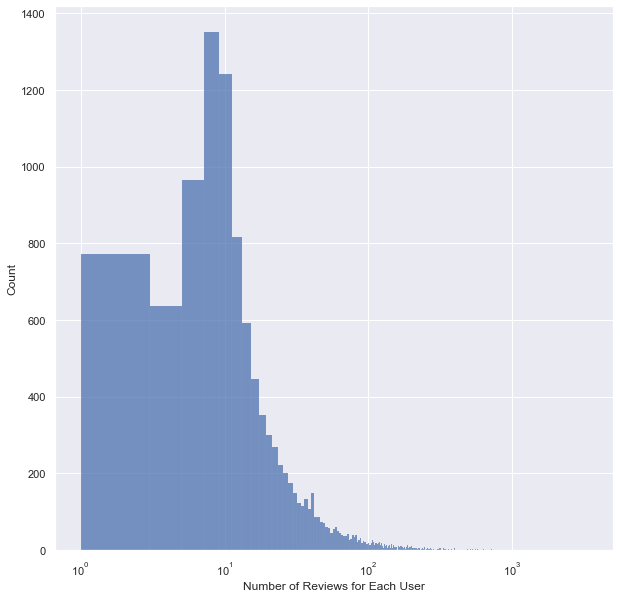

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.histplot(x='review_detail',data=reviewer)
_ .set_xscale('log')
_ = plt.xlabel("Number of Reviews for Each User")

The most of the reviewer have __less than 10 reviews__ as we see in the histogram.

How would be this distribution if we look at the director in reviews.

In [15]:
director = review_db.groupby('director').agg(Sum=('index','count'))
director = director.sort_values(by='Sum',ascending=False)[0:20]
director = director.reset_index(level=0)
top_director = director.director.values

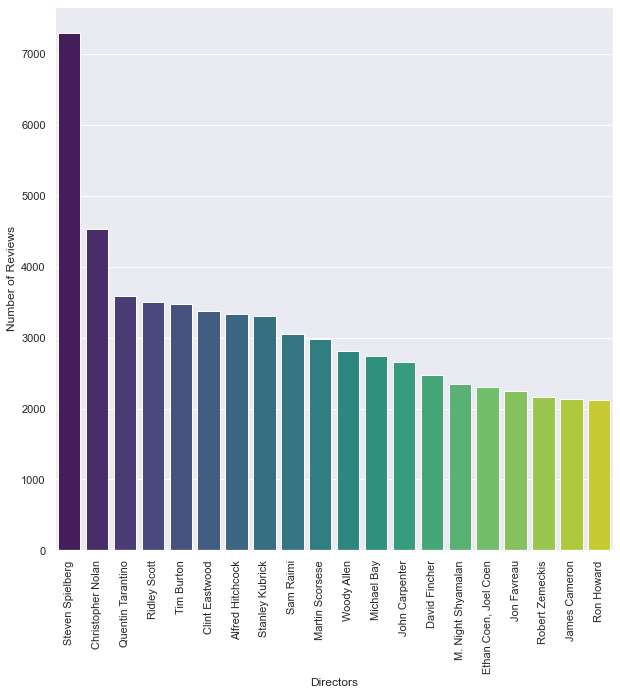

In [16]:
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.barplot(x='director',y='Sum',data=director,palette="viridis")
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Directors")
_ = plt.ylabel("Number of Reviews")

Obviously famous directors have the most review about them. But how many of these reviews lable as "love it".

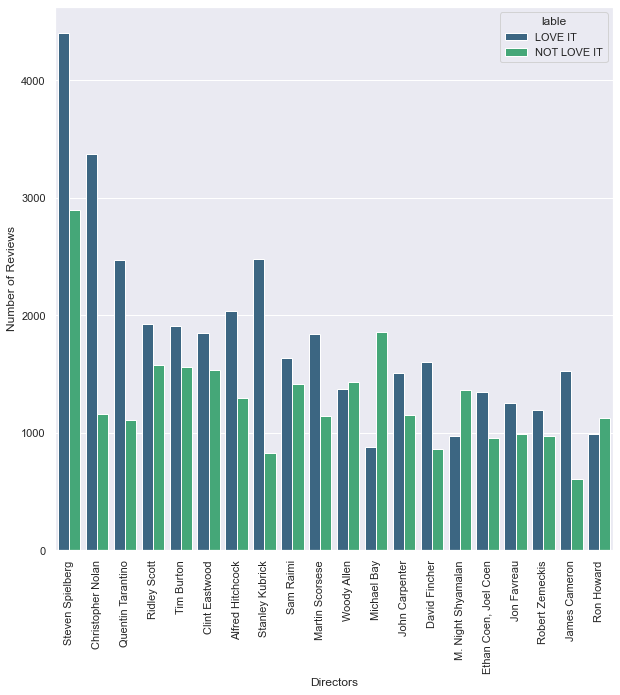

In [17]:
top_directors = review_db[review_db.director.isin(top_director)]
top_directors
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.countplot(x='director',data=top_directors,palette="viridis",hue='lable',order = top_directors['director'].value_counts().index)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Directors")
_ = plt.ylabel("Number of Reviews")

The result also was excpected. __Micheal Bay__ and __M. Night Shyamalan__ are notorious of making a bad blockbuster and here we can see they have more negetive review. Beside that __Woody Allen__ also has more negetive review than positive and that might because of the drama that he faced in the media recently.

In [18]:
title = review_db.groupby('movie').agg(Sum=('index','count'))
title = title.sort_values(by='Sum',ascending=False)[0:20]
title = title.reset_index(level=0)
top_movie = title.movie.values

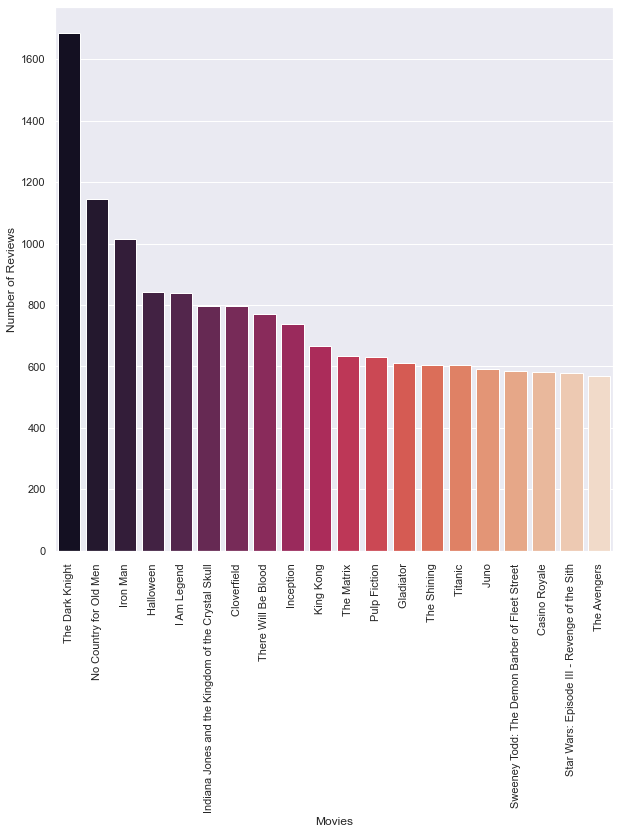

In [19]:
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.barplot(x='movie',y='Sum',data=title,palette="rocket")
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Movies")
_ = plt.ylabel("Number of Reviews")

The movies that come out since that the imdb website create and are famous amoung the viewer have most of the review.

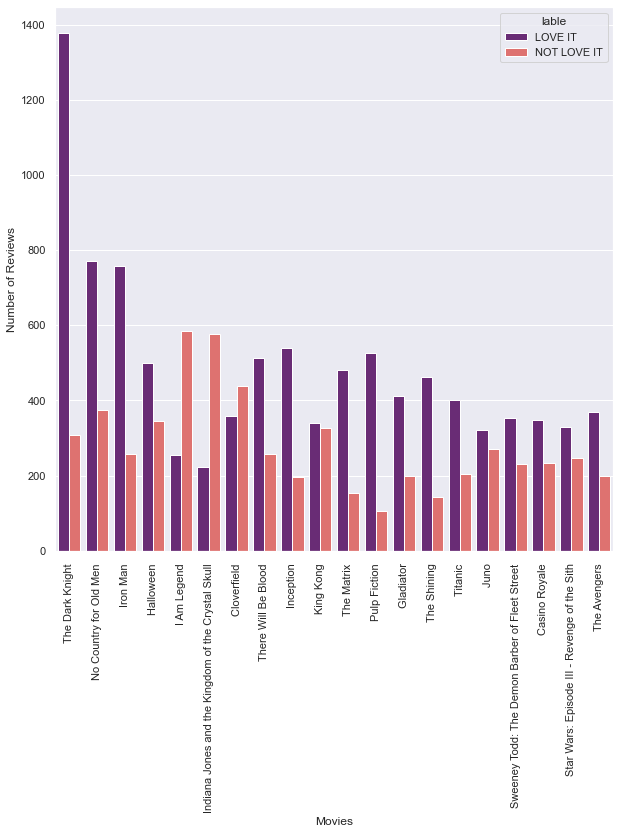

In [20]:
top_review = review_db[review_db.movie.isin(top_movie)]
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.countplot(x='movie',data=top_review,palette="magma",hue='lable',order = top_review['movie'].value_counts().index)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Movies")
_ = plt.ylabel("Number of Reviews")

Almost all of the top moview has more positive review. There are only three movies that have a more negetive review, __I am Legend__, __Indiana Jones and the Kingdom of the Crystal Skull__, and __Cloverfield__.

In [21]:
review_db['year'] = pd.to_datetime(review_db['review_date']).dt.year

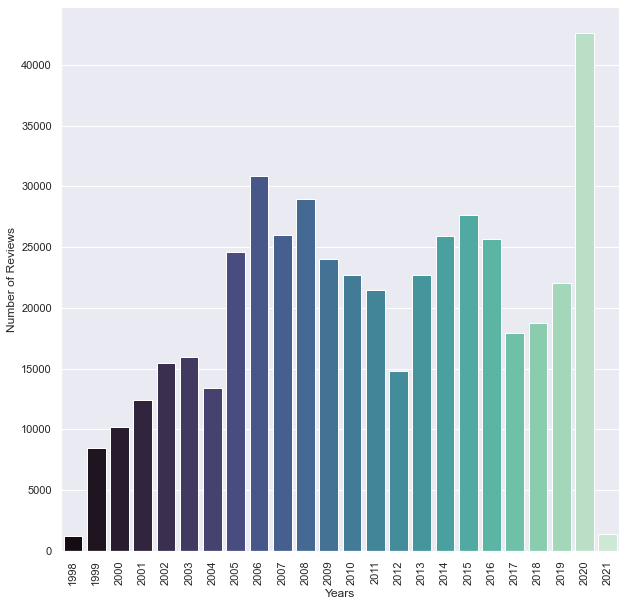

In [22]:
_ = sns.countplot(x='year',data=review_db,palette='mako')
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Years")
_ = plt.ylabel("Number of Reviews")

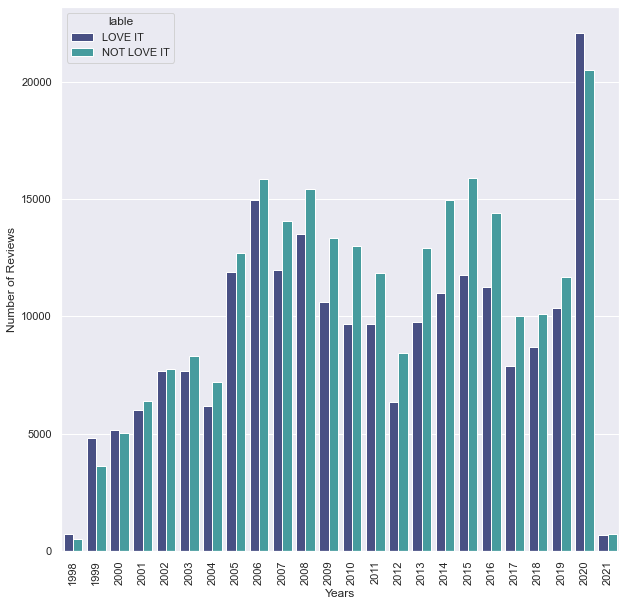

In [23]:
_ = sns.countplot(x='year',data=review_db,palette='mako',hue='lable')
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Years")
_ = plt.ylabel("Number of Reviews")

In 2020 user of the IMDB provide the largest number of review. People were at home because of pandamic and used more than ever the online streaming service and write more review for them. Also, for the first after IMDB created, there were more positive review more than negetive, probably because more regular audience using the IMDB and write review in contrast to before which only cinephile used to write a review on IMDB.

In [24]:
genre = review_db.groupby('genre_1').agg(Sum=('index','count'))
genre = genre.sort_values(by='Sum',ascending=False)
genre = genre.reset_index(level=0)

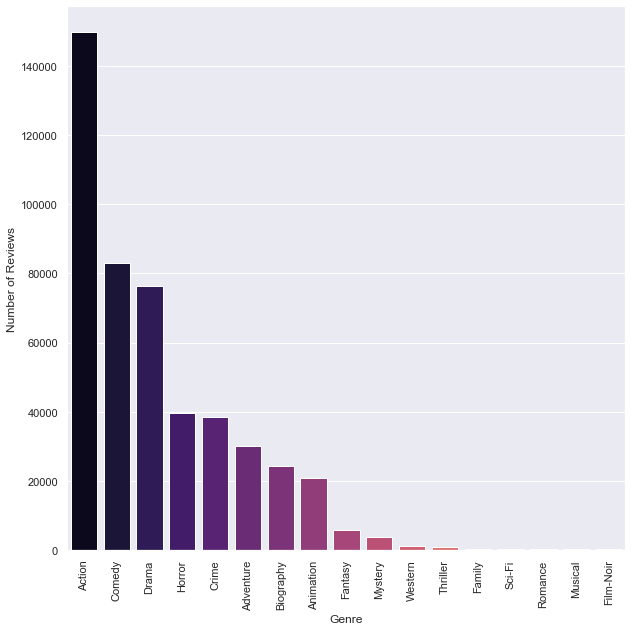

In [25]:
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.barplot(x='genre_1',y='Sum',data=genre,palette="magma")
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Genre")
_ = plt.ylabel("Number of Reviews")

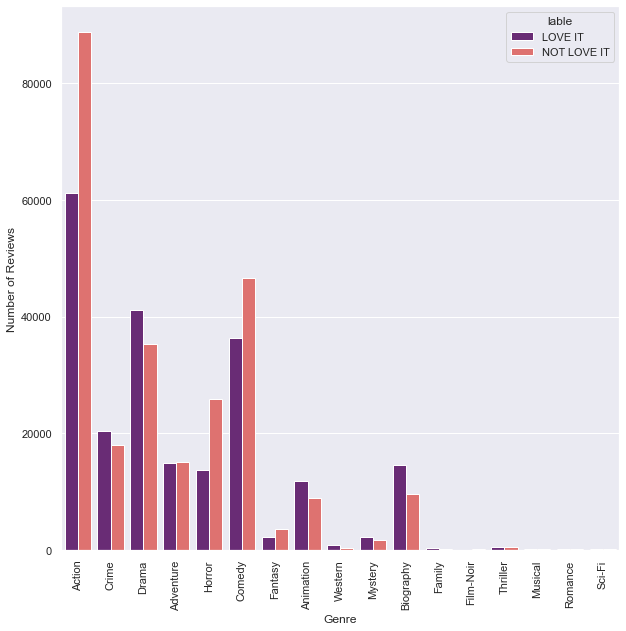

In [26]:
sns.set(rc={'figure.figsize':(10,10)})
_ = sns.countplot(x='genre_1',data=review_db,palette="magma",hue='lable')
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Genre")
_ = plt.ylabel("Number of Reviews")

Action and comedy have most of the reviews but in same time lots of those reviews are negetive. Drama in third place has more positive than negetive review.